=== DATA OVERVIEW ===
Antal rader: 80
Antal kolumner: 9

Kolumner: ['person', 'lang', 'z1000t', 'z0t', 'z1000mem', 'z1000rel', 'm1000rel', 'whours', 'caps']

Förhandsgranskning:


,person,lang,z1000t,z0t,z1000mem,z1000rel,m1000rel,whours,caps
Unnamed: 0,,,,,,,,,
0,s018,c,0.017,0.017,22432,98.10,96.8,16.1,NaN
1,s030,c,0.617,0.033,16968,76.47,92.1,4.0,NaN
2,s036,c,20.900,0.000,11440,0.00,89.5,8.2,NaN
3,s066,c,0.750,0.467,2952,98.48,100.0,7.3,NaN
4,s078,c,0.050,0.050,22496,99.24,98.4,10.9,NaN



=== MEAN VALUES PER LANGUAGE ===


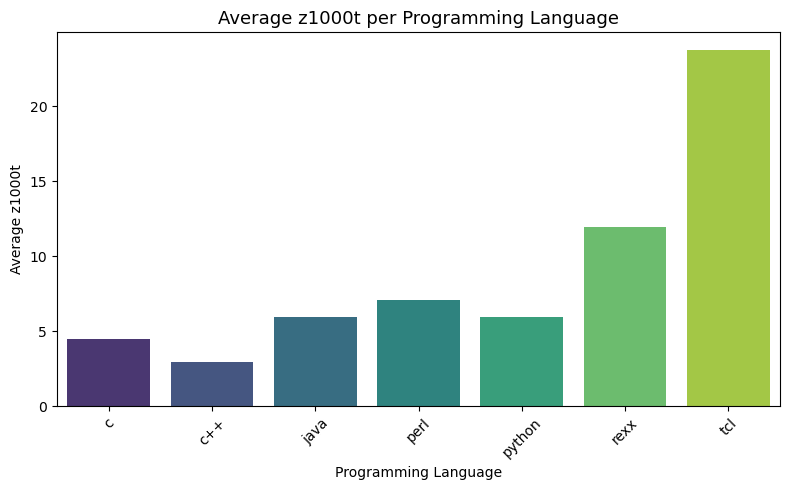

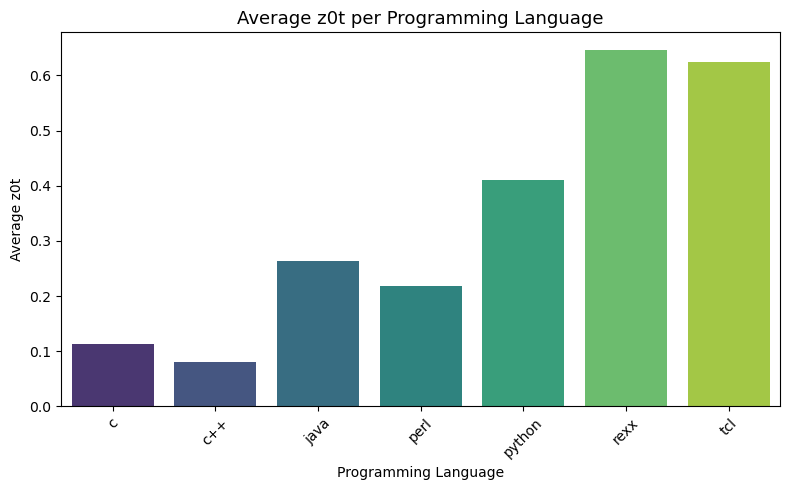

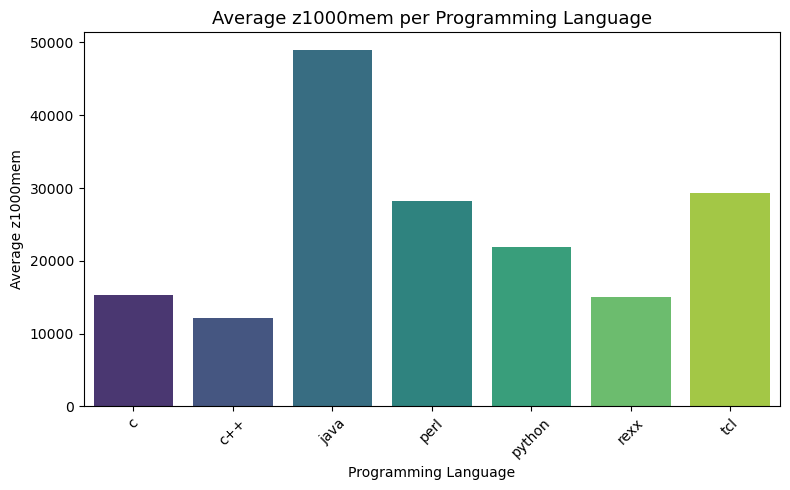

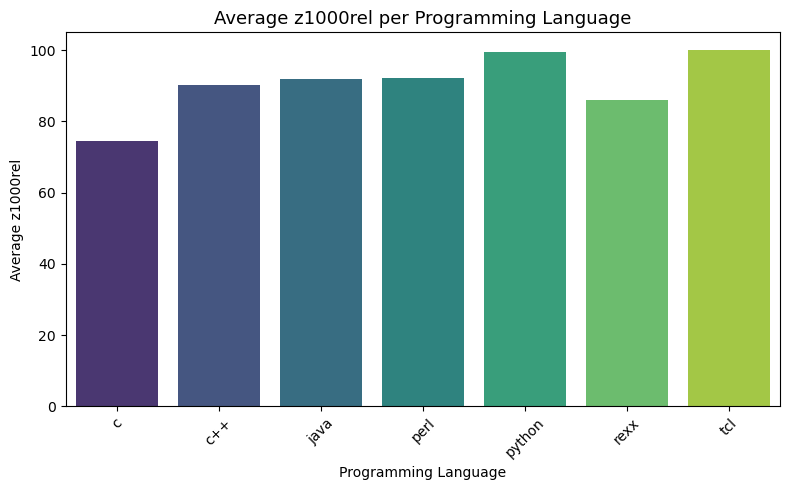

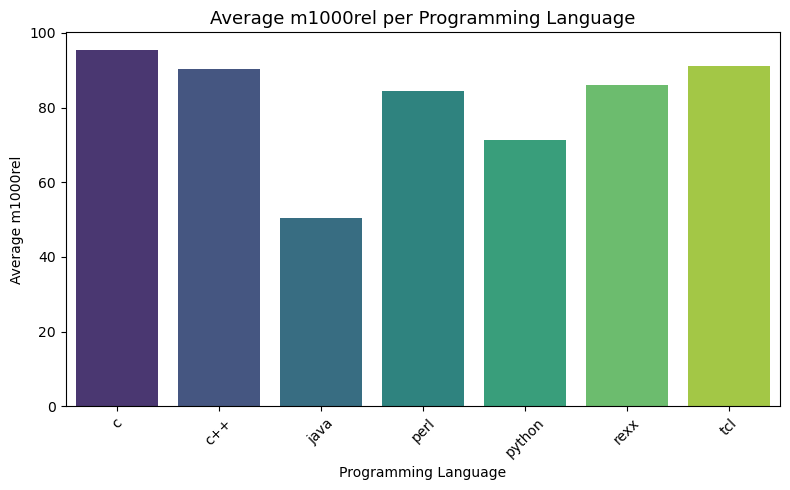

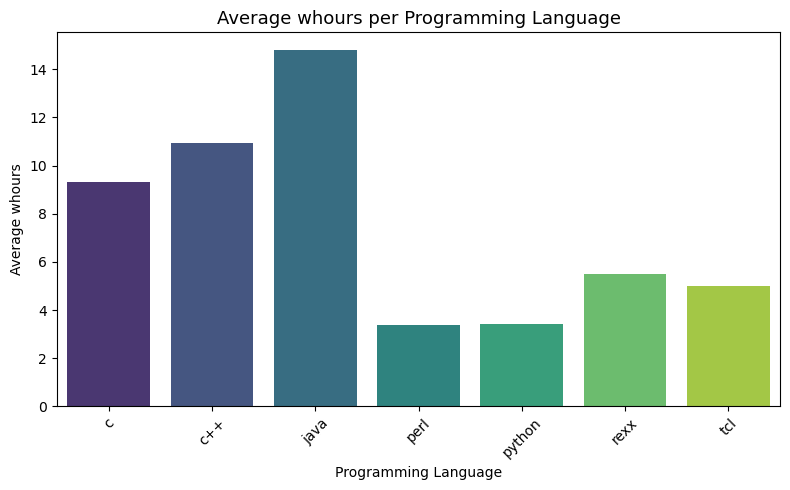

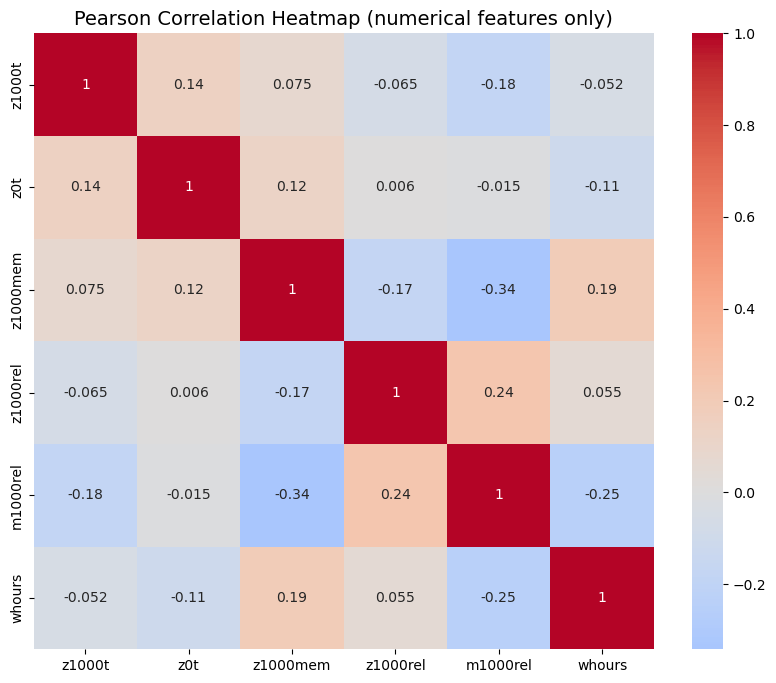

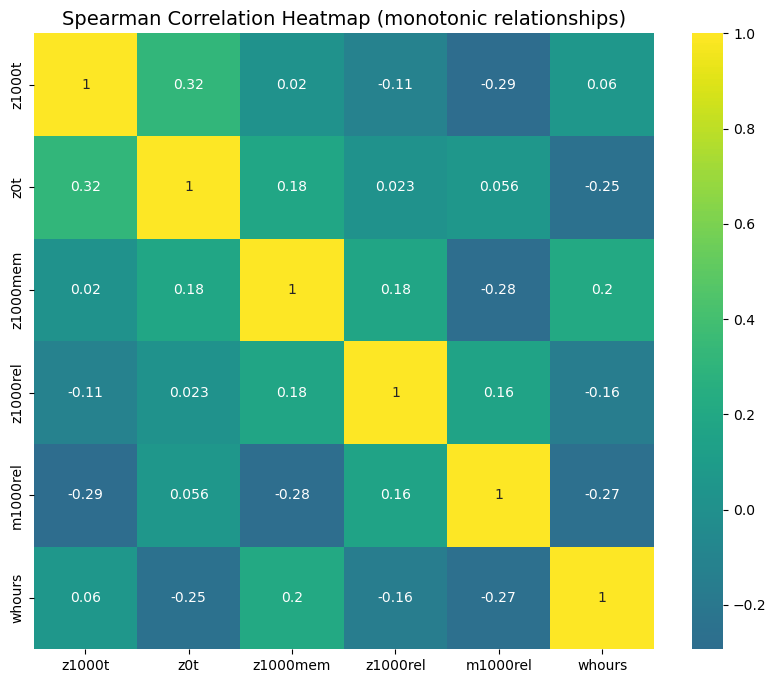


=== SKEWNESS ===
z1000t      5.968264
z0t         2.286949
z1000mem    1.140270
z1000rel   -3.383277
m1000rel   -1.057224
whours      3.315726
dtype: float64

=== CATEGORY BALANCE ===

Kolumn: person
person
s018       1.25
s030       1.25
s149206    1.25
s149205    1.25
s149204    1.25
           ... 
s056       1.25
s054       1.25
s053       1.25
s050       1.25
s149411    1.25
Name: proportion, Length: 80, dtype: float64

Kolumn: lang
lang
java      30.00
perl      16.25
python    16.25
c++       13.75
tcl       12.50
c          6.25
rexx       5.00
Name: proportion, dtype: float64

Kolumn: caps
caps
10-25%    39.473684
0-10%     36.842105
25-40%    10.526316
40-60%     7.894737
60-75%     5.263158
Name: proportion, dtype: float64

=== INTERPRETATION GUIDE ===
1️⃣ Descriptive statistics visar central tendens och spridning.
2️⃣ Histogrammen visar om variablerna är normalfördelade eller snedfördelade.
3️⃣ Boxplots avslöjar eventuella outliers.
4️⃣ Countplots visar om någon kategori (

In [1]:
# 📊 --- Exploratory Data Analysis (EDA) ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------- 1️⃣ Läs in datan --------------------
df = pd.read_csv("assignment_3_dataset_clean.csv", index_col=0)

print("=== DATA OVERVIEW ===")
print(f"Antal rader: {len(df)}")
print(f"Antal kolumner: {len(df.columns)}")
print("\nKolumner:", list(df.columns))
print("\nFörhandsgranskning:")
display(df.head())

print("\n=== MEAN VALUES PER LANGUAGE ===")

# Kolla vilka kolumner som är numeriska
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Skapa stapeldiagram för varje numerisk kolumn grupperad per språk
for col in numeric_cols:
    if "lang" in df.columns:
        plt.figure(figsize=(8, 5))
        sns.barplot(
            x="lang", 
            y=col, 
            data=df, 
            estimator="mean", 
            errorbar=None,          # replaces ci=None
            hue="lang",             # to keep color mapping valid
            palette="viridis", 
            legend=False            # disables duplicate legends
        )
        plt.title(f"Average {col} per Programming Language", fontsize=13)
        plt.xlabel("Programming Language")
        plt.ylabel(f"Average {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# -------------------- 6️⃣ Correlation Heatmap --------------------
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True, method="pearson")
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Pearson Correlation Heatmap (numerical features only)", fontsize=14)
plt.show()

# --- Spearman correlation ---
plt.figure(figsize=(10, 8))
corr_spearman = df.corr(numeric_only=True, method="spearman")
sns.heatmap(corr_spearman, annot=True, cmap="viridis", center=0)
plt.title("Spearman Correlation Heatmap (monotonic relationships)", fontsize=14)
plt.show()

# -------------------- 7️⃣ Skewness (snedhet) --------------------
print("\n=== SKEWNESS ===")
print(df.skew(numeric_only=True))

# -------------------- 8️⃣ Bias / imbalance check --------------------
print("\n=== CATEGORY BALANCE ===")

# Identify categorical columns (fix for NameError)
cat_cols = df.select_dtypes(include=["object"]).columns

for col in cat_cols:
    print(f"\nKolumn: {col}")
    print(df[col].value_counts(normalize=True) * 100)
    
# -------------------- 9️⃣ Sammanfattande kommentar --------------------
print("""
=== INTERPRETATION GUIDE ===
1️⃣ Descriptive statistics visar central tendens och spridning.
2️⃣ Histogrammen visar om variablerna är normalfördelade eller snedfördelade.
3️⃣ Boxplots avslöjar eventuella outliers.
4️⃣ Countplots visar om någon kategori (t.ex. 'lang') dominerar, vilket kan innebära bias.
5️⃣ Korrelationer nära 0 tyder på oberoende variabler, medan ±1 indikerar starka samband.
6️⃣ Skewness > 1 eller < -1 innebär kraftig snedfördelning.
""")